# Deep learning baseline project

## Data setup

In [211]:
from torchvision.datasets import MNIST
import torch.nn as nn
import torch.optim as optim
import torch
from typing import Tuple
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# The data is a size 28x28
mnist_trainset = MNIST("./temp/", train=True, download=True)
mnist_testset = MNIST("./temp/", train=False, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./temp/MNIST/raw/train-images-idx3-ubyte.gz to ./temp/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./temp/MNIST/raw/train-labels-idx1-ubyte.gz to ./temp/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./temp/MNIST/raw/t10k-images-idx3-ubyte.gz to ./temp/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./temp/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./temp/MNIST/raw



In [97]:
# Split data into training, validation and testing sets
train_valid_split = int(len(mnist_trainset) * 0.8)
x_train = mnist_trainset.data[:train_valid_split].float()
y_train = mnist_trainset.targets[:train_valid_split]

x_valid = mnist_trainset.data[train_valid_split:].float()
y_valid = mnist_trainset.targets[train_valid_split:]

x_test = mnist_testset.data.float()
y_test = mnist_testset.targets

## Baseline model

In [200]:
class BaselineCNN(nn.Module):
    """ The baseline class is a baseline for other types of neural networks"""
    def __init__(self, num_classes: int, image_size: Tuple[int, int], kernel_size: int, stride:int = 1):
        super().__init__()
        # Init
        self.num_classes = num_classes
        self.image_size = image_size
        self.kernel_size = kernel_size
        self.stride = stride
        
        # Convolutional layer
        self.conv1 = nn.Conv1d(*self.image_size, kernel_size=self.kernel_size, stride=self.stride)
        
        # fully connected layers
        self.fc1 = nn.Linear(self.image_size[0] * (self.image_size[1] - self.kernel_size + self.stride), self.num_classes)
        
        # Activation function
        self.activate = nn.ReLU()
        
        # Softmax
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """ The forward function is used to predict a result based on the input image"""
        # Conv
        x_conv = self.conv1(x)
        x_conv = self.activate(x_conv)
        # Flattening
        x_conv = x_conv.view(len(x), -1)
        # Fully connected
        x_fc = self.fc1(x_conv)
        x_fc = self.softmax(x_fc)
        return x_fc

In [201]:
net = BaselineCNN(
    num_classes = len(y_train.unique()),
    image_size = tuple(x_train[0].shape),
    kernel_size = 3
)
print(net)

BaselineCNN(
  (conv1): Conv1d(28, 28, kernel_size=(3,), stride=(1,))
  (fc1): Linear(in_features=728, out_features=10, bias=True)
  (activate): ReLU()
  (softmax): Softmax(dim=1)
)


Epoch  1 : Train Loss 0.000048 , Train acc 0.146604, Valid acc 0.140917
Epoch 31 : Train Loss 0.000045 , Train acc 0.310417, Valid acc 0.305500
Epoch 61 : Train Loss 0.000043 , Train acc 0.402021, Valid acc 0.398417
Epoch 91 : Train Loss 0.000041 , Train acc 0.499771, Valid acc 0.503500
Epoch 121 : Train Loss 0.000039 , Train acc 0.591979, Valid acc 0.599750
Epoch 151 : Train Loss 0.000038 , Train acc 0.639271, Valid acc 0.643500
Epoch 181 : Train Loss 0.000037 , Train acc 0.667729, Valid acc 0.672250
Epoch 211 : Train Loss 0.000036 , Train acc 0.711125, Valid acc 0.717333
Epoch 241 : Train Loss 0.000036 , Train acc 0.756417, Valid acc 0.761250
Epoch 271 : Train Loss 0.000035 , Train acc 0.779271, Valid acc 0.783250
Epoch 301 : Train Loss 0.000035 , Train acc 0.789854, Valid acc 0.791333
Epoch 331 : Train Loss 0.000035 , Train acc 0.797396, Valid acc 0.797833
Epoch 361 : Train Loss 0.000035 , Train acc 0.802771, Valid acc 0.802917
Epoch 391 : Train Loss 0.000034 , Train acc 0.807292, V

(Text(0.5, 0, 'Updates'), Text(0, 0.5, 'Acc'))

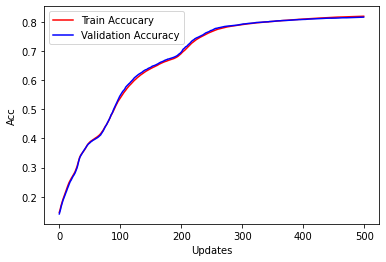

In [214]:
# Init
losses = []
valid_acc = []
train_acc = []

# Init network
net = BaselineCNN(
    num_classes = len(y_train.unique()),
    image_size = tuple(x_train[0].shape),
    kernel_size = 3
)
# Hyperparameters
num_epochs = 500
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.8)
criterion = nn.CrossEntropyLoss()

for epoch in range(num_epochs):
    # Forward -> Backprob -> Update params
    ## Train
    net.train()
    
    # Optimizer
    optimizer.zero_grad()
    output = net(x_train)

    # compute gradients given loss
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    # Save losses
    losses.append(loss / len(y_train))    
    
    ### Evaluate training
    net.eval()
    output = net(x_train)

    y_preds = torch.max(output, 1)[1]
    train_acc_cur = accuracy_score(y_train.numpy(), y_preds.numpy())
    
    ### Evaluate validation
    output = net(x_valid)
    y_preds = torch.max(output, 1)[1]
    valid_acc_cur = accuracy_score(y_valid.numpy(), y_preds.numpy())
    
    train_acc.append(train_acc_cur)
    valid_acc.append(valid_acc_cur)
    
    if epoch % 30 == 0:
        print("Epoch %2i : Train Loss %f , Train acc %f, Valid acc %f" % (
                epoch+1, losses[-1], train_acc_cur, valid_acc_cur))

epoch = np.arange(len(train_acc))
plt.figure()
plt.plot(epoch, train_acc, 'r', epoch, valid_acc, 'b')
plt.legend(['Train Accucary','Validation Accuracy'])
plt.xlabel('Updates')
plt.ylabel('Acc')

In [220]:
print(f'Training accuracy: {train_acc[-1]*100:.2f}%\nValidation accuracy: {valid_acc[-1]*100:.2f}%')

Training accuracy: 81.86%
Validation accuracy: 81.55%
